# ¡Hola Omar!

Mi nombre es Ezequiel Ferrario, soy code reviewer en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.
</div>

¡Empecemos!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.



El propósito del proyecto es determinar el sistema de tarifas más conveniente para la empresa para aumentar la publicidad dedicada a este; basándonos en los datos de comportamiento de los usuarios actuales.


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda que lo que esta entre corchete es una mera guia para el alumno. Este al ser un proyecto simulando un espacio profesional, deberias eliminar los mismos.

Esta correccion aplica a cualquier parte donde se encuentre este tipo de guias ya que es un requisito de **forma** obligatorio para aprobar el proyecto (es decir, que no quede ninguna guia/corchete).</div>



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Primero que nada gracias, efectivamente los primeros corchetes se me escaparon.
</div>

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt

from IPython.display import display


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_calls=pd.read_csv("/datasets/megaline_calls.csv" )
df_internet=pd.read_csv("/datasets/megaline_internet.csv" )
df_messages=pd.read_csv("/datasets/megaline_messages.csv")
df_tarifas=pd.read_csv("/datasets/megaline_plans.csv")
df_users=pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

Vamos a explorar cada tabla, el tipo de datos que contiene, cantidad de datos nulos, errores en los datos y columnas.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_tarifas.info()
#df_tarifas.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_tarifas.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate




Notamos las dos entradas, los dos planes tarifarios apartentemente en perfectas condiciones en el dataframe, sin dados nulos, con el tipo de datos correcto y nombres en snake_case. Por otro lado, convertir los nombres en categorias puede ser util.

## Corregir datos

La información de los planes tarifarios esta en casi perfectas condiciones, pasaremos los MB a GB.


In [5]:
df_tarifas["gb_per_month_included"]=df_tarifas["mb_per_month_included"]/1024


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda que nuestro cliente utiliza la medida en gb, transforma los mb a gb (recorda la correcta conversion).</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se agrego una columna con la conversión correcta.
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

## Enriquecer los datos


Por ahora no agregaremos niinguna otra columna.

## Usuarios/as

Analizamos la información de los usuarios.

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

df_users.describe()
df_users[df_users.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica que no existen duplicados.</div>
<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se hizo la verificación y se agregó a las observaciones

</div>

In [7]:
# Imprime una muestra de datos para usuarios
df_users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
52,1052,Edmond,Hopkins,47,"Houston-The Woodlands-Sugar Land, TX MSA",2018-03-05,surf,NaN
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,NaN
72,1072,Seymour,Spence,66,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-12,surf,NaN
75,1075,Salena,Bates,35,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-06,surf,NaN
477,1477,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaN
351,1351,Kyle,Grimes,47,"San Antonio-New Braunfels, TX MSA",2018-09-05,ultimate,NaN
433,1433,Lyndon,Morrison,29,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-29,ultimate,NaN
43,1043,Carlos,Hinton,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-20,ultimate,NaN
252,1252,Mitsue,York,27,"Detroit-Warren-Dearborn, MI MSA",2018-06-10,surf,NaN
341,1341,Kaila,Andrews,28,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-17,surf,NaN


Los tipos de datos se ven adecuados, excepto en churn_date, que deben ser fechas,  no encontramos datos duplicados, existen datos ausentes, pero en "churn_date" el dato vacío debe ser remplazado para indicar que la persona sigue usando el plan, aparte de esto no hay problemas con los datos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
df_users['churn_date']= pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
#agregar none = -1
df_users['reg_date']= pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

La columna `reg_date` debe tener formato fecha.</div>



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se cambió el formato.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

### Enriquecer los datos

Agregaremos la columna "región", para facilitar el analisis posterior y combinaremos "NY" y "NY-NJ", pues esta ultima es una supra-categoria de la primera:


In [9]:
#print(df_users["city"].unique())
df_users["region"]=df_users["city"].str.extract(r',\s*([A-Z]{2}(?:-[A-Z]{2})?)')

#print(sorted(df_users["region"].unique()))
df_users["region"].replace("NY","NY-NJ",inplace=True)
#print(sorted(df_users["region"].unique()))

df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",NaT,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",NaT,surf,NaT,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",NaT,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",NaT,surf,NaT,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",NaT,surf,NaT,WA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",NaT,surf,NaT,NY-NJ
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",NaT,surf,NaT,LA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",NaT,ultimate,NaT,CA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",NaT,surf,NaT,NY-NJ


## Llamadas
Analizamos la información de las llamadas.

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [11]:
# Imprimimos una muestra de datos para las llamadas y buscamos duplicados
display(df_calls.sample(10),
df_calls[df_calls.duplicated()])


,id,user_id,call_date,duration
113694,1400_32,1400,2018-04-29,0.00
88248,1324_296,1324,2018-07-19,12.71
130863,1470_312,1470,2018-08-01,0.00
30344,1114_76,1114,2018-11-18,0.00
120757,1421_99,1421,2018-12-19,9.10
73740,1261_520,1261,2018-09-14,9.19
84054,1305_564,1305,2018-08-28,10.78
62245,1223_422,1223,2018-12-20,5.37
127439,1456_319,1456,2018-06-23,13.46
20321,1077_288,1077,2018-03-15,3.65


,id,user_id,call_date,duration


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica que no existen duplicados.</div>


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se hizo la revisión y se agrego a las observaciónes. 
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

No tenemos duplicados, pero existen multiples llamadas con duración "0.00", es necesario determinar si estas llamadas se redondean a cero, asumiremos que se redondean a cero por ser llamadas no concretada.

Tambien convertiremos call_date a tipo date_time, cambiaremos el nombre del id de llamadas.

### Corregir los datos

Cambiaremos el ID de las llamadas a "call_id" para que sea claro que id es, daremos formato a call date como datetime y aplicaremos un redondeo hacia arriba.

In [12]:
#df_calls=df_calls[df_calls["duration"]!=0.00].reset_index(drop=True)
df_calls.rename({'id': 'call_id'}, axis=1, inplace=True)
df_calls["call_date"]=pd.to_datetime(df_calls["call_date"],format="%Y-%m-%d")
df_calls["duration"]=np.ceil(df_calls["duration"])
df_calls.sample(10)

,call_id,user_id,call_date,duration
73319,1261_66,1261,2018-10-27,0.0
26126,1099_451,1099,2018-12-22,0.0
5530,1027_73,1027,2018-07-21,11.0
92428,1332_84,1332,2018-11-20,0.0
137024,1496_193,1496,2018-09-27,3.0
60188,1217_9,1217,2018-11-15,15.0
115369,1404_163,1404,2018-09-19,11.0
38882,1145_129,1145,2018-11-17,6.0
6969,1032_119,1032,2018-12-10,8.0
56572,1202_841,1202,2018-11-04,11.0


### Enriquecer los datos


Agregaremos una columna que incluya solo el mes de las llamadas.

In [13]:
df_calls["month"]=df_calls["call_date"].dt.month
df_calls

,call_id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11
137731,1499_200,1499,2018-10-20,11.0,10
137732,1499_201,1499,2018-09-21,9.0,9
137733,1499_202,1499,2018-10-10,1.0,10


<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Extrae solo el numero del mes, esto hara que luego al graficar sea todo mucho mas facil.</div>



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Gracias, es una gran idea para las graficas posteriores.</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

En este caso el cliente tiene una forma particular de llevar el recuento de la duracion de las llamadas (aplica un redondeo).

Realizalo, el mejor metodo es el ceiling de **numpy**. Utilizalo para redondear de forma eficiente. </div>



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo, habia olvidado el redondeo particular.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido. Muy bien.</div>

## Mensajes
Analizaremos la información de los mensajes.


In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [15]:
# Imprimimos una muestra de datos para los mensajes y verificamos duplicados:
display(df_messages[df_messages.duplicated()],
df_messages.sample(10))

,id,user_id,message_date


,id,user_id,message_date
43039,1281_388,1281,2018-08-17
71856,1467_188,1467,2018-10-16
70360,1456_388,1456,2018-11-16
60640,1382_246,1382,2018-10-16
21658,1132_1101,1132,2018-11-03
50015,1328_973,1328,2018-12-26
55569,1349_270,1349,2018-12-06
12896,1084_136,1084,2018-11-15
45777,1312_261,1312,2018-08-10
27471,1169_704,1169,2018-12-16


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica que no existen duplicados.</div>



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se verifica y se agrega a las observaciones.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>



Notamos que no hay duplicados, pero haremos multiples cambios, renombraremos la columna id para que sea inconfundible con la de otros DF, cambiaremos el tipo de dato de message_date a date_time.

### Corregir los datos

In [16]:
df_messages.rename({'id': 'message_id'}, axis=1, inplace=True)
df_messages["message_date"]=pd.to_datetime(df_messages["message_date"],format="%Y-%m-%d")

### Enriquecer los datos


Agregaremos una columna del mes en el que se envio el mensje.

In [17]:
df_messages["month"]=df_messages["message_date"].dt.month

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Extrae solo el numero del mes, esto hara que luego al graficar sea todo mucho mas facil.</div>


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

In [18]:
df_messages.sample(10)

,message_id,user_id,message_date,month
28806,1175_141,1175,2018-10-04,10
63035,1399_100,1399,2018-08-04,8
16518,1110_409,1110,2018-10-04,10
62848,1398_14,1398,2018-12-12,12
52789,1337_33,1337,2018-12-17,12
24381,1145_236,1145,2018-12-19,12
29316,1180_159,1180,2018-12-09,12
34014,1214_108,1214,2018-08-24,8
66217,1433_157,1433,2018-09-27,9
22651,1134_67,1134,2018-09-19,9


Tras las modificaciones nuestros miles de datos tienen un id inconfundible para el usuario que lo mandó y el mensaje, al igual que se indica claramente el mes de envío.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Describi los datos - y su distribucion- observados en este dataset y concluí al respecto de los cambios realizado. Esta parte es muy importante debido que es aquí donde también esta nuestro valor, ya que el cliente podrá no entender el código pero si el análisis o la descripcion.</div>



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Agregué un pequeño comentario, pero no me queda del todo claro los insigths que debo exponer de este dataframe.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido. Muy bien.</div>

## Internet
Analizamos el consumo de internet

In [19]:
# Imprimimos la información general sobre el DataFrame de internet, 
#Revisamos datos nulos.

df_internet.info()
display(
df_internet.describe(),
df_internet[df_internet.duplicated()])
df_internet.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


,id,user_id,session_date,mb_used


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [20]:
# Imprime una muestra de datos para el tráfico de internet

df_internet.sample(10)

,id,user_id,session_date,mb_used
75556,1356_4,1356,2018-09-30,710.97
22547,1103_92,1103,2018-10-06,290.99
101962,1488_395,1488,2018-07-05,703.83
95594,1446_6,1446,2018-10-04,397.61
23680,1109_258,1109,2018-12-29,195.61
82724,1386_39,1386,2018-12-31,361.48
72486,1336_561,1336,2018-06-13,720.86
73892,1346_480,1346,2018-12-12,169.01
11140,1055_145,1055,2018-05-25,515.15
33788,1153_351,1153,2018-12-05,502.31


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Verifica que no existen duplicados.</div>





<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Listo.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

Nos aseguramos de no tener datos repetidos.

Vemos que el consumo esta en MB, no pasaremos el consumo a GB ni redondearemos pues esto se aplica al total por mes.

Podemos observar que hay usuarios que no usan su servicio de internet, pero en promedio se usan alrededor de 366 por sesión.

Vemos que los datos tienen un "id", este se puede llegar a confundir con otros ids, asi que cambiaremos su nombre,cambiar el tipo de dato de la sesión a datetime,decidir si redondear o no los mb usados, tambien hace falta poder identificar el mes de la sesión con mas facilidad.



<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Describi los datos - y su distribucion- observados en este dataset y concluí al respecto de los cambios realizado. Esta parte es muy importante debido que es aquí donde también esta nuestro valor, ya que el cliente podrá no entender el código pero si el análisis o la descripcion.</div>



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Agregue una pequeña descripción, no me queda claro que puntos deberia cubrir.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido. Aqui lo que podes extraer es la distribucion de `mb_used` para entender la distribucion del consumo de internet de todos los usuarios.</div>


### Corregir los datos

In [21]:
df_internet.rename({"id":"internet_id"}, inplace=True)
df_internet["session_date"]=pd.to_datetime(df_internet["session_date"],format="%Y-%m-%d")


### Enriquecer los datos

Agregamos una columna con el mes de la sesión.


In [22]:
df_internet["month"]=df_internet["session_date"].dt.month
#df_internet["gb_used"]=np.ceil(df_internet["mb_used"]/1024)

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Extrae solo el numero del mes, esto hara que luego al graficar sea todo mucho mas facil.</div>



<div class="alert alert-block alert-info">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Listo.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

In [23]:
df_internet.sample(10)

,id,user_id,session_date,mb_used,month
72955,1341_28,1341,2018-10-13,246.41,10
34906,1156_503,1156,2018-05-07,539.26,5
18065,1081_130,1081,2018-06-29,277.13,6
79295,1369_36,1369,2018-12-27,724.70,12
50600,1226_81,1226,2018-07-08,246.26,7
32706,1147_340,1147,2018-08-16,352.23,8
70072,1328_31,1328,2018-04-30,819.30,4
26984,1125_32,1125,2018-12-23,74.06,12
30968,1141_331,1141,2018-09-27,530.76,9
50047,1223_246,1223,2018-10-04,454.59,10


Ahora tenemos nuestros datos en los formatos correctos para analizar con columnas del uso de gigabytes y el mes de la sesión expresados en formas claras.

In [24]:
#(df_internet["mb_used"]/1024).hist()
#plt.show()
#df_internet["gb_used"].hist()
#plt.show()

## Estudiar las condiciones de las tarifas

Analizamos las tarifas nuevamente:

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


Creamos un dataframe maestro del comportamiento de cada usuario en cada mes, esto permitirá hacer análisis en un solo dataframe del comportamiento de los usuarios, la forma en la que se realizan llamadas, se mandan mensajes, se consume internet y el ingreso económico que se genera por usuario y mes.

Primero agruparemos a cada usuario con las llamadas que realiza.


In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_user=(df_calls.groupby(["user_id","month"])["call_id"].count()).to_frame()
display(calls_user,type(calls_user))


call_id
user_id month         
1000    12          16
1001    8           27
        9           49
        10          65
        11          64
...                ...
1498    12          39
1499    9           41
        10          53
        11          45
        12          65

[2258 rows x 1 columns]

pandas.core.frame.DataFrame

Ahora agruparemos a cada usuario con la cantidad de minutos en los que estuvieron en llamada.

In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
mins_user=(df_calls.groupby(["user_id","month"])["duration"].sum()).to_frame()
display(mins_user)


duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
...                 ...
1498    12        339.0
1499    9         346.0
        10        385.0
        11        308.0
        12        496.0

[2258 rows x 1 columns]

Ahora a cada usuario con la cantidad de mensajes que realizo en cada mes.

In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
message_user=(df_messages.groupby(["user_id","month"])["message_id"].count()).to_frame()
display(message_user)


message_id
user_id month            
1000    12             11
1001    8              30
        9              44
        10             53
        11             36
...                   ...
1496    9              21
        10             18
        11             13
        12             11
1497    12             50

[1806 rows x 1 columns]

Agrupamos a cada usuario con la cantidad de GB que uso cada mes.

In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_user=(df_internet.groupby(["user_id","month"])["mb_used"].sum()).to_frame()
internet_user["gb_used"]=np.ceil(internet_user["mb_used"]/1024)
display(internet_user)


mb_used  gb_used
user_id month                   
1000    12      1901.47      2.0
1001    8       6919.15      7.0
        9      13314.82     14.0
        10     22330.49     22.0
        11     18504.30     19.0
...                 ...      ...
1498    12     23137.69     23.0
1499    9      12984.76     13.0
        10     19492.43     20.0
        11     16813.83     17.0
        12     22059.21     22.0

[2277 rows x 2 columns]

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nuestro cliente utiliza como principal medida GB. Y en este caso estas utilizando mb para calcular el internet.

Hace la conversion a GB y luego aplica el ceil para cumplir con los requisitos con el cliente.

Este es el momento de hacer  esto ya que de lo contrario podriamos sobreestimar el consumo.
</div>



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se revisó y cambió en la sección de "corregir datos" del internet.
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>


Ahora crearemos un DataF que agrupe la información de cada usuario por mes.

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#isplay(calls_user) #calls_user,mins_user,message_user,internet_user
Users_usagge=calls_user.merge(mins_user,
                              how="outer",
                              on=['user_id', 'month'],
                              sort=True)
Users_usagge=Users_usagge.merge(message_user,
                              how="outer",
                              on=['user_id', 'month'],
                              sort=True)
Users_usagge=Users_usagge.merge(internet_user,
                              how="outer",
                              on=['user_id', 'month'],
                              sort=True)
Users_usagge.fillna(value=0,inplace=True)
Users_usagge

call_id  duration  message_id   mb_used  gb_used
user_id month                                                  
1000    12        16.0     124.0        11.0   1901.47      2.0
1001    8         27.0     182.0        30.0   6919.15      7.0
        9         49.0     315.0        44.0  13314.82     14.0
        10        65.0     393.0        53.0  22330.49     22.0
        11        64.0     426.0        36.0  18504.30     19.0
...                ...       ...         ...       ...      ...
1498    12        39.0     339.0         0.0  23137.69     23.0
1499    9         41.0     346.0         0.0  12984.76     13.0
        10        53.0     385.0         0.0  19492.43     20.0
        11        45.0     308.0         0.0  16813.83     17.0
        12        65.0     496.0         0.0  22059.21     22.0

[2293 rows x 5 columns]

Obtuvimos un dataframe que resume el usuario y la cantidad de llamadas, minutos, mensajes e internet consumido por mes.

In [31]:
# Añade la información de la tarifa

Users_usagge.reset_index(inplace=True)
Users_usagge=Users_usagge.merge(df_users[{"plan","user_id","region"}],
                                on='user_id',
                                 how='left')


display(Users_usagge.set_index(['user_id', 'month'], drop=True))

call_id  duration  message_id   mb_used  gb_used      plan  \
user_id month                                                               
1000    12        16.0     124.0        11.0   1901.47      2.0  ultimate   
1001    8         27.0     182.0        30.0   6919.15      7.0      surf   
        9         49.0     315.0        44.0  13314.82     14.0      surf   
        10        65.0     393.0        53.0  22330.49     22.0      surf   
        11        64.0     426.0        36.0  18504.30     19.0      surf   
...                ...       ...         ...       ...      ...       ...   
1498    12        39.0     339.0         0.0  23137.69     23.0      surf   
1499    9         41.0     346.0         0.0  12984.76     13.0      surf   
        10        53.0     385.0         0.0  19492.43     20.0      surf   
        11        45.0     308.0         0.0  16813.83     17.0      surf   
        12        65.0     496.0         0.0  22059.21     22.0      surf   

              region  
user_id month         
1000    12        GA  
1001    8         WA  
        9         WA  
        10        WA  
        11        WA  
...              ...  
1498    12     NY-NJ  
1499    9         FL  
        10        FL  
        11        FL  
        12        FL  

[2293 rows x 7 columns]

In [32]:
#A continuación usaremos un DF auxiliar para aplicar las tarifas a cada usuario y obtener los ingresos que cada uno generó
#a lo largo de los meses.

Users_usagge2=Users_usagge.merge(df_tarifas,
                                 left_on="plan",
                                 right_on="plan_name",
                                 how='left')
#Users_usagge2.set_index(['user_id', 'month'], inplace=True, drop=True)

#Users_usagge2
display(Users_usagge2.set_index(['user_id', 'month'], drop=True))

call_id  duration  message_id   mb_used  gb_used      plan  \
user_id month                                                               
1000    12        16.0     124.0        11.0   1901.47      2.0  ultimate   
1001    8         27.0     182.0        30.0   6919.15      7.0      surf   
        9         49.0     315.0        44.0  13314.82     14.0      surf   
        10        65.0     393.0        53.0  22330.49     22.0      surf   
        11        64.0     426.0        36.0  18504.30     19.0      surf   
...                ...       ...         ...       ...      ...       ...   
1498    12        39.0     339.0         0.0  23137.69     23.0      surf   
1499    9         41.0     346.0         0.0  12984.76     13.0      surf   
        10        53.0     385.0         0.0  19492.43     20.0      surf   
        11        45.0     308.0         0.0  16813.83     17.0      surf   
        12        65.0     496.0         0.0  22059.21     22.0      surf   

              region  messages_included  mb_per_month_included  \
user_id month                                                    
1000    12        GA               1000                  30720   
1001    8         WA                 50                  15360   
        9         WA                 50                  15360   
        10        WA                 50                  15360   
        11        WA                 50                  15360   
...              ...                ...                    ...   
1498    12     NY-NJ                 50                  15360   
1499    9         FL                 50                  15360   
        10        FL                 50                  15360   
        11        FL                 50                  15360   
        12        FL                 50                  15360   

               minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
user_id month                                                                   
1000    12                 3000               70           7             0.01   
1001    8                   500               20          10             0.03   
        9                   500               20          10             0.03   
        10                  500               20          10             0.03   
        11                  500               20          10             0.03   
...                         ...              ...         ...              ...   
1498    12                  500               20          10             0.03   
1499    9                   500               20          10             0.03   
        10                  500               20          10             0.03   
        11                  500               20          10             0.03   
        12                  500               20          10             0.03   

               usd_per_minute plan_name  gb_per_month_included  
user_id month                                                   
1000    12               0.01  ultimate                   30.0  
1001    8                0.03      surf                   15.0  
        9                0.03      surf                   15.0  
        10               0.03      surf                   15.0  
        11               0.03      surf                   15.0  
...                       ...       ...                    ...  
1498    12               0.03      surf                   15.0  
1499    9                0.03      surf                   15.0  
        10               0.03      surf                   15.0  
        11               0.03      surf                   15.0  
        12               0.03      surf                   15.0  

[2293 rows x 16 columns]



Con ayuda del DF auxiliar, calcularemos los ingresos que generó cada usuario usando una función "income".



In [33]:
# Calcula el ingreso mensual para cada usuario
def income(user):
    ex_minutes=max(0,(user["duration"]-user["minutes_included"]))
    #print("extra minutos=",ex_minutes)
    
    ex_messages=max(0,(user["message_id"]-user["messages_included"]))
    #print("Extra mensajes=",ex_messages)
    
    ex_GB=max(0,(user["gb_used"]-user["gb_per_month_included"]))
    #print("extra GB=",ex_GB)
    #print("costo del plan:",user["usd_monthly_pay"])
    
    total_income=(
        user["usd_monthly_pay"]+
        ex_minutes*user["usd_per_minute"]+
        ex_messages*user["usd_per_message"]+
        ex_GB*user["usd_per_gb"])
    
    #print("total income:",total_income)
    return total_income
    
#print(income(Users_usagge2.iloc[10]))
#print(income(Users_usagge2.iloc[1]))

Users_usagge["income"]=Users_usagge2.apply(income,axis=1)
display(Users_usagge.set_index(['user_id', 'month'], drop=True))


call_id  duration  message_id   mb_used  gb_used      plan  \
user_id month                                                               
1000    12        16.0     124.0        11.0   1901.47      2.0  ultimate   
1001    8         27.0     182.0        30.0   6919.15      7.0      surf   
        9         49.0     315.0        44.0  13314.82     14.0      surf   
        10        65.0     393.0        53.0  22330.49     22.0      surf   
        11        64.0     426.0        36.0  18504.30     19.0      surf   
...                ...       ...         ...       ...      ...       ...   
1498    12        39.0     339.0         0.0  23137.69     23.0      surf   
1499    9         41.0     346.0         0.0  12984.76     13.0      surf   
        10        53.0     385.0         0.0  19492.43     20.0      surf   
        11        45.0     308.0         0.0  16813.83     17.0      surf   
        12        65.0     496.0         0.0  22059.21     22.0      surf   

              region  income  
user_id month                 
1000    12        GA   70.00  
1001    8         WA   20.00  
        9         WA   20.00  
        10        WA   90.09  
        11        WA   60.00  
...              ...     ...  
1498    12     NY-NJ  100.00  
1499    9         FL   20.00  
        10        FL   70.00  
        11        FL   40.00  
        12        FL   90.00  

[2293 rows x 8 columns]

En esta sección agrupamos cada id de usuario con la cantidad de llamadas, minutos en llamada, cantidad de mensajes enviados y cantidad de internet consumido en cada mes, posteriormente unimos esta información junto con el plan en el que cada usuario se encuentra y finalmente agregamos el ingreso que aportó cada usuario en cada mes.

Con esta información podremos realizar análisis y gráficos que nos den insights del comportamiento de los clientes.



<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Describi y concluí al respecto de todo lo realizado en en esta sección. Esta parte es muy importante debido que es aquí donde también esta nuestro valor, ya que el cliente podrá no entender el código pero si el análisis o la descripcion.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente el calculo de los ingresos la union de los datasets.</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Gracias.

He agregado descripciónes a lo largo de la sección al igual que un resumen al final, junto con una conclusión indicando para que servira este dataframe.
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

## Estudia el comportamiento de usuario



Estudiaremos de forma general el uso de llamadas y sus respectivos minutos, la cantidad de mensajes mandados, el consumo de MB y el ingreso generado por usuario en cada mes.

### Llamadas

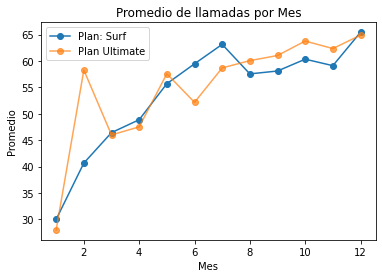

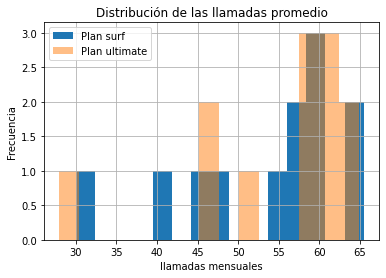

In [34]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. 
#Traza un gráfico de barras para visualizarla.
user_calls_mean=Users_usagge.groupby(["plan","month"])["call_id"].mean()

#display(user_calls_mean)
user_calls_mean["surf"].plot(
    kind="line",
    marker="o"
    )
user_calls_mean["ultimate"].plot(
    kind="line",
    alpha=0.7,
    marker="o"
    )
plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('Promedio de llamadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.show()

user_calls_mean["surf"].hist(bins=15)
user_calls_mean["ultimate"].hist(bins=15,alpha=0.5)
plt.legend(["Plan surf","Plan ultimate"])
plt.title('Distribución de las llamadas promedio')
plt.xlabel('llamadas mensuales')
plt.ylabel('Frecuencia')




plt.show()


Tenemos tres graficos:
- En el primer grafico, podemos ver una comparativa de llamadas promedio por mes para cada plan, aunque hay diferencias en el uso entre los planes, el plan surf en general hace mas llamadas.
- En el segundo grafico vemos la distribución de llamadas promedio, para el plan surf se realizan mas llamadas de menos duración que para el plan ultimate y se evitan las llamadas inecesariamente largas.

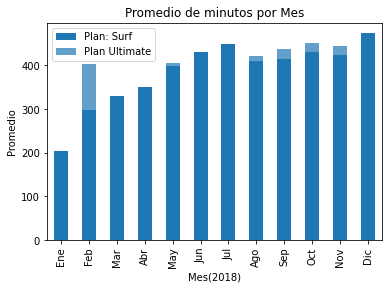

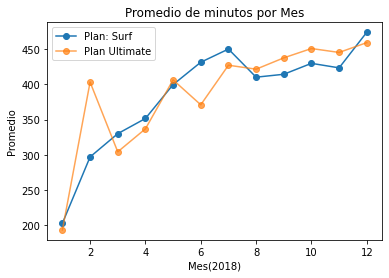

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan.
#Traza un histograma.
user_mins_mean=Users_usagge.groupby(["plan","month"])["duration"].mean()
fig, ax = plt.subplots()

#display(user_mins_mean)
user_mins_mean["surf"].plot(
    kind="bar",
    ax=ax
    )
user_mins_mean["ultimate"].plot(
    kind="bar",
    alpha=0.7,
    ax=ax
    )

etiquetas = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ax.set_xticklabels(etiquetas)

plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('Promedio de minutos por Mes')
plt.xlabel('Mes(2018)')
plt.ylabel('Promedio')
plt.show()
#En este punto tengo duda de porque el grafico contiene toda la fecha. al igual no entiendo por que no me grafica 
#las barras lado a lado con distintos colores.


#A continuación una grafica de lineas en la que se aprecian las diferencias y el eje x es apropiado por default

user_mins_mean["surf"].plot(
    kind="line",
    marker="o"
    )
user_mins_mean["ultimate"].plot(
    kind="line",
    marker="o",
    alpha=0.7
    )
plt.legend(["Plan: Surf","Plan Ultimate"]) 

plt.title('Promedio de minutos por Mes')
plt.xlabel('Mes(2018)')
plt.ylabel('Promedio')
plt.show()


En este par de graficos podemos ver el consumo de minutos por plan mes a mes.
Notamos que los usuarios surf se restringen al inicio del año a comparación de los usuarios ultimate, restricciones que parecen desaparecer conforme avanza el año.

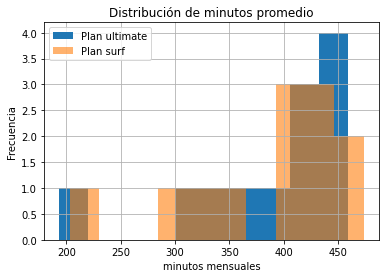

In [36]:
user_mins_mean["ultimate"].hist()
plt.title('Distribución de minutos promedio')
plt.xlabel('minutos mensuales')
plt.ylabel('Frecuencia')

user_mins_mean["surf"].hist(alpha=0.6)

plt.legend(["Plan ultimate","Plan surf"])

plt.show()

En este ultimo histograma notamos que la distribución de mensajes es muy similar, pero los usuarios del plan surf parecen preferir ligeramente los mensajes mas largos.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda realizar un histograma.</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

In [37]:
# Calcula la media y la varianza de la duración mensual de llamadas.
display((user_mins_mean["surf"]-user_mins_mean["ultimate"]).to_frame().describe())
Calls_mean=(user_mins_mean["surf"]-user_mins_mean["ultimate"]).mean()
calls_var=Calls_stats=(user_mins_mean["surf"]-user_mins_mean["ultimate"]).var()
Calls_median=(user_mins_mean["surf"]-user_mins_mean["ultimate"]).median()
Calls_std=(user_mins_mean["surf"]-user_mins_mean["ultimate"]).std()
Calls_mode=(user_mins_mean["surf"]-user_mins_mean["ultimate"]).mode()

display("La media es: ",Calls_mean,"Con una varianza de: ",calls_var,
        "\n una mediana de ",Calls_median, 
        "y una desviación estandar de:",Calls_std)


,duration
count,12.000000
mean,-3.530051
std,40.568088
min,-106.142857
25%,-21.222359
50%,1.421518
75%,16.781774
max,60.341522


'La media es: '

-3.5300510378855137

'Con una varianza de: '

1645.7697556834735

'\n una mediana de '

1.4215181370353775

'y una desviación estandar de:'

40.56808789779811

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta muy bien pero explora mas estadisticos. La mediana, moda, la desviacion standard</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

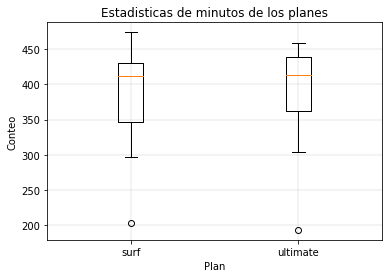

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas


box=plt.boxplot([user_mins_mean["surf"],user_mins_mean["ultimate"]])

plt.title('Estadisticas de minutos de los planes')
plt.xlabel('Plan')  
plt.ylabel('Conteo') 
plt.xticks([1, 2], ['surf', 'ultimate'])
plt.grid(True,linewidth=0.3) 

plt.show()


**Podemos ver que en promedio los usuarios de surf usan casi 3 minutos menos en promedio al mes, sin embargo con una varianza tres ordenes de magnitud mayor, hay demasiada dispersión para asegurar que los comportamientos son diferentes.**

### Mensajes

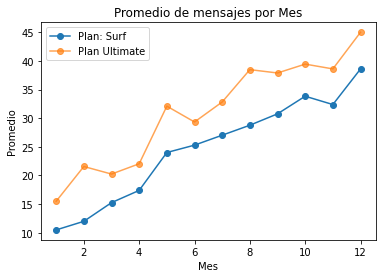

In [39]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

user_messages_mean=Users_usagge.groupby(["plan","month"])["message_id"].mean()

#display(user_messages_mean)
user_messages_mean["surf"].plot(
    kind="line",
    marker="o"
    )
user_messages_mean["ultimate"].plot(
    kind="line",
    alpha=0.7,
    marker="o"
    )
plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('Promedio de mensajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.show()

Notamos que los usuarios surf mandan en general menos mensajes.
Los usuarios de ambos planes mandan mas mensajes conforme avanza el año.

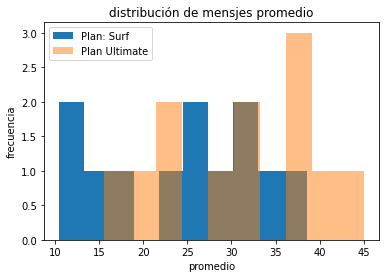

In [40]:
user_messages_mean["surf"].plot(
    kind="hist"
    )
user_messages_mean["ultimate"].plot(
    kind="hist",
    alpha=0.5)
plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('distribución de mensjes promedio')
plt.xlabel('promedio')
plt.ylabel('frecuencia')
plt.show()

Vamos que los usuarios surf tienen preferencia por promedios menores que los usuarios ultimate.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda realizar un histograma.</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

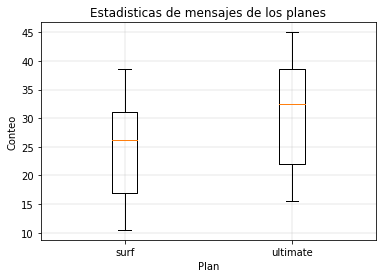

In [41]:

box=plt.boxplot([user_messages_mean["surf"],user_messages_mean["ultimate"]])

plt.title('Estadisticas de mensajes de los planes')
plt.xlabel('Plan')  
plt.ylabel('Conteo') 
plt.xticks([1, 2], ['surf', 'ultimate'])
plt.grid(True,linewidth=0.3) 

plt.show()

In [42]:
# Calcula la media y la varianza de la cantidad mensual de mensajes.
M_diff=(user_messages_mean["surf"]-user_messages_mean["ultimate"])

display(M_diff.to_frame().describe())

messages_mean=M_diff.mean()
messages_var=M_diff.var()

messages_var=M_diff.var()
messages_median=M_diff.median()
messages_std=M_diff.std()

display("La media mensajes mandados es: ",messages_mean,"Con una varianza de: ",messages_var,
        "una mediana de ",messages_median, 
        "y una desviación estandar de:",messages_std)

,message_id
count,12.000000
mean,-6.433498
std,1.857396
min,-9.701095
25%,-7.371962
50%,-6.009295
75%,-4.997283
max,-4.041456


'La media mensajes mandados es: '

-6.433497638967995

'Con una varianza de: '

3.4499215910784566

'una mediana de '

-6.009295412667157

'y una desviación estandar de:'

1.8573964550085844

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta muy bien pero explora mas estadisticos. La mediana, moda, la desviacion standard</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

 **En esta ocasión podemos notar tanto del grafico de caja como de las cantidades estadisticas que los usuarios del plan  surf mandan aproximadamente 6.5 mensajes menos al mes.**

### Internet

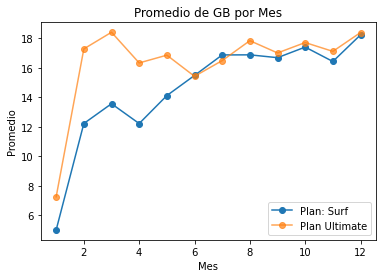

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

user_internet_mean=Users_usagge.groupby(["plan","month"])["gb_used"].mean()

#display(user_internet_mean)

user_internet_mean["surf"].plot(
    kind="line",
    marker="o"
    )
user_internet_mean["ultimate"].plot(
    kind="line",
    alpha=0.7,
    marker="o"
    )
plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('Promedio de GB por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.show()

En este grafico podemos ver el uso de internet de usuarios de ambos planes, vemos como enero fue un mes de muy bajo uso, tras lo que se normalizo.

Vemos como los usuarios surf mantienen un uso bajo al inicio del año y luego alcanzó a los usuarios ultimate.

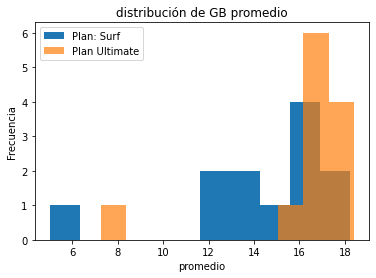

In [44]:
user_internet_mean["surf"].plot(
    kind="hist"
    )
user_internet_mean["ultimate"].plot(
    kind="hist",
    alpha=0.7
    )
plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('distribución de GB promedio')
plt.xlabel('promedio')
plt.ylabel('Frecuencia')
plt.show()

Vemos que los usuarios surf tienen una distribución mas baja, prefiriendo consumos menores.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda realizar un histograma.</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

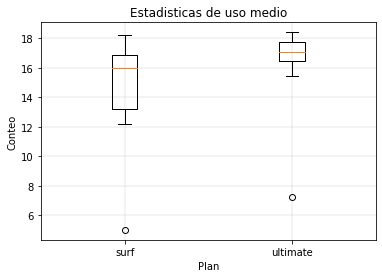

In [45]:
box=plt.boxplot([user_internet_mean["surf"],user_internet_mean["ultimate"]])

plt.title('Estadisticas de uso medio')
plt.xlabel('Plan')  
plt.ylabel('Conteo') 
plt.xticks([1, 2], ['surf', 'ultimate'])
plt.grid(True,linewidth=0.3) 

plt.show()

In [46]:
I_diff=user_internet_mean["surf"]-user_internet_mean["ultimate"]

display(I_diff.to_frame().describe())

internet_mean=I_diff.mean()
internet_var=I_diff.var()

internet_var=I_diff.var()
internet_median=I_diff.median()
internet_std=I_diff.std()

display("La media de internet consumido es: ",internet_mean,"Con una varianza de: ",internet_var,
        "una mediana de ",internet_median, 
        "y una desviación estandar de:",internet_std)

,gb_used
count,12.000000
mean,-1.751357
std,1.992229
min,-5.063492
25%,-3.087223
50%,-0.824685
75%,-0.270363
max,0.384508


'La media de internet consumido es: '

-1.751356657830229

'Con una varianza de: '

3.9689768905800507

'una mediana de '

-0.8246846015062737

'y una desviación estandar de:'

1.9922291260244267

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta muy bien pero explora mas estadisticos. La mediana, moda, la desviacion standard</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>



**Estadisticamente los usuarios "ultimate" usan casi 1.5GB mas que los usuarios "surf", pero con una varianza 3 ordenes de magnitud mas grande no es posible hacer conclusiones precisas; sin embargo el grafico de uso medio nos permite ver que lo usuarios "ultimate" tienen un uso mas consistente a lo largo del año que los usuarios surf.**

## Ingreso


Buscaremos diferencias en los ingresos a lo largo de los meses dependiendo del plan 

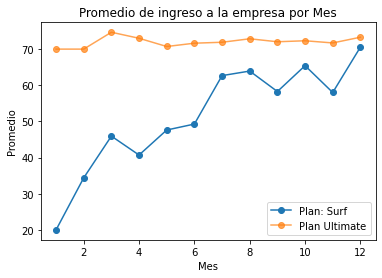

In [47]:
user_income_mean=Users_usagge.groupby(["plan","month"])["income"].mean()

#display(user_income_mean)

user_income_mean["surf"].plot(
    kind="line",
    marker="o"
    )
user_income_mean["ultimate"].plot(
    kind="line",
    alpha=0.7,
    marker="o"
    )
plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('Promedio de ingreso a la empresa por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.show()

Vemos el ingreso en ambos planes, conforme los usuarios surf dejan de restringirse, la cantidad de ingresos que producen aumenta considerablemente.

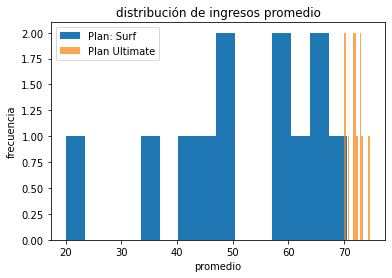

In [48]:
user_income_mean["surf"].plot(
    bins=15,
    kind="hist"
    )
user_income_mean["ultimate"].plot(
    bins=15,
    kind="hist",
    alpha=0.7
    )
plt.legend(["Plan: Surf","Plan Ultimate"]) 
plt.title('distribución de ingresos promedio')
plt.xlabel('promedio')
plt.ylabel('frecuencia')
plt.show()

Contrario a la expectativa, el plan surf produce menores ingresos mas meses que el plan ultimate.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda realizar un histograma.</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Listo </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

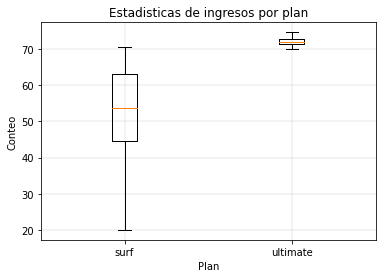

In [49]:
box=plt.boxplot([user_income_mean["surf"],user_income_mean["ultimate"]])

plt.title('Estadisticas de ingresos por plan')
plt.xlabel('Plan')  
plt.ylabel('Conteo') 
plt.xticks([1, 2], ['surf', 'ultimate'])
plt.grid(True,linewidth=0.3) 

plt.show()

In [50]:
income_surf_mean=(user_income_mean["surf"]).mean()
income_surf_var=(user_income_mean["surf"]).var()
income_surf_median=(user_income_mean["surf"]).median()
income_surf_std=(user_income_mean["surf"]).std()

print("La media de ingreso del plan surf es: ",income_surf_mean,"\nCon una varianza de: ",income_surf_var,
        "\nuna mediana de ",income_surf_median, 
        "\ny una desviación estandar de:",income_surf_std)


income_ultimate_mean=(user_income_mean["ultimate"]).mean()
income_ultimate_var=(user_income_mean["ultimate"]).var()
income_ultimate_median=(user_income_mean["ultimate"]).median()
income_ultimate_std=(user_income_mean["ultimate"]).std()

print("\nLa media de ingreso del plan ultimate es: ",income_ultimate_mean,"\nCon una varianza de: ",income_ultimate_var,
        "\nuna mediana de ",income_ultimate_median, 
        "\ny una desviación estandar de:",income_ultimate_std)

income_diff=(user_income_mean["surf"]-user_income_mean["ultimate"])

income_diff_mean=income_diff.mean()
income_diff_var=income_diff.var()
income_diff_median=income_diff.median()
income_diff_std=income_diff.std()
print("\nLa media de la diferencia de ingresos entre planes es: ",income_diff_mean,"\nCon una varianza de: ",income_diff_var,
        "\nuna mediana de ",income_diff_median, 
        "\ny una desviación estandar de:",income_diff_std)

La media de ingreso del plan surf es:  51.40102516969467 
Con una varianza de:  216.03874156078263 
una mediana de  53.6402821390842 
y una desviación estandar de: 14.698256412268178

La media de ingreso del plan ultimate es:  72.01106825881764 
Con una varianza de:  1.8606807455920105 
una mediana de  71.966594402838 
y una desviación estandar de: 1.3640677203101064

La media de la diferencia de ingresos entre planes es:  -20.610043089122964 
Con una varianza de:  197.1392887068091 
una mediana de  -18.062699044058014 
y una desviación estandar de: 14.040629925569903


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta muy bien pero explora mas estadisticos. La mediana, moda, la desviacion standard</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>


**A lo largo del año los ingresos del plan surf varian significativamente, siendo casi 20 dolares al inicio del año y mas de 60 dolares a finales de este, promediando 51 dolares; en cambio el plan ultimate genera un ingreso casi constante de 72.8 dolares al año con poca variación.**

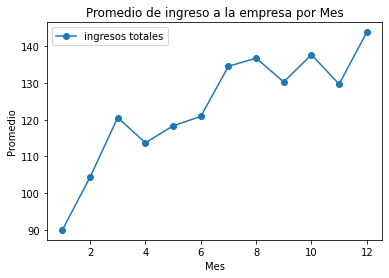

In [51]:
total_income=user_income_mean["surf"]+user_income_mean["ultimate"]


total_income.plot(
    kind="line",
    marker="o",
    )


plt.legend(["ingresos totales"]) 
plt.title('Promedio de ingreso a la empresa por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.show()

**Podemos ver que los ingresos aumentan casi 50% entre el inicio y fin de año**

## Prueba las hipótesis estadísticas


Planteamos nuestra hipoteseis nula: *El ingreso del plan "ultimate" es igual al plan "surf"*


y de forma directa la hipotesis alternativa: *El ingreso del plan "ultimate" es diferente al plan "surf"*

Probaremos que los ingresos son estadisticamente diferentes:

In [52]:
# Prueba las hipótesis
#Como las poblaciones estan consientes de la diferencia entre planes,
#no podemos considerar que tengan comportamientos similares, es decir, no son muestras relacionadas

results = st.ttest_ind(
    user_income_mean["surf"],
    user_income_mean["ultimate"],
    equal_var = True)
print('p-value: ', results.pvalue)


p-value:  7.83119144714113e-05


**Con un valor p tan pequeño podemos afirmar con seguridad de las poblaciones no son iguales y que efectivamente el plan ultimate genera mayores ganancias**

<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Cuando realizamos la prueba de t.estudent es muy importante un parametro que es el equal_var (False or True), que significa si existe la igualdad de varianzas o no de ambas muestras. En este trabajo no pedimos ser finos con esto pero te lo dejo a modo de que entiendas el porque y te va a servir en futuros proyecto.

El bojetivo de la prueba de t de Student es comparar las medias de dos grupos de datos y determinar si existen diferencias significativas entre ellos. Se aplica cuando estamos interesados en saber si la diferencia entre las medias es real o simplemente producto del azar.

Para esto generamos dos hipotesis H0 y H1 (nula y alternativa, respectivamente).

Hipótesis nula (H0): No hay diferencia significativa entre las medias de los dos grupos.
Hipótesis alternativa (H1): Hay una diferencia significativa entre las medias de los dos grupos.

En este caso realizas  una observacion de las dos varianzas, lo que no esta mal, pero depender únicamente de la diferencia en los valores de las varianzas puede llevar a conclusiones equivocas, mas que nada si las muestras tienen tamaños diferentes . Las pruebas estadísticas están diseñadas para tomar en cuenta el tamaño de la muestra y calcular si la diferencia observada en las varianzas es estadísticamente significativa o si podría deberse al azar.

Para saber lo del equal_var utilizamos La función levene en scipy.stats que se utiliza para realizar una prueba de igualdad de varianzas entre dos grupos de datos. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

Los resultados  de esta prueba es muy parecido a lo que hacemos en el t.student. Ya que Si el valor p obtenido en la prueba levene es mayor que un nivel de significancia (alpha) previamente elegido (por ejemplo, 0.05), entonces asumimos que las varianzas son iguales (aceptamos H0).
Si el valor p es menor que alpha, rechazamos la hipótesis nula y asumimos que las varianzas son diferentes.

Por lo tanto, si las varianzas son iguales (aceptamos H0 en la prueba levene), puedes establecer equal_var=True al realizar la prueba t de Student.
Si las varianzas son diferentes (rechazamos H0 en la prueba levene), debes establecer equal_var=False al realizar la prueba t de Student. Esto indica que se debe usar una versión de la prueba t que no asuma igualdad de varianzas, como la prueba Welch's t.

Siempre recordar que los outliers pueden impactar negativamente en esta prueba (t.student)

Esto es basicamente por lo que te corrijo lo del equal_var pero es como consejo y que lo sepas a futuro. Esta en vos si lo queres modificar o no.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Te agradezco muchisimo los comentarios e información, lo tendré en mente para proyectos futuros.
    
Tengo entendido que cuando se comparan dos muestras de naturaleza diferente se suele usar "equal_var=False", pues existen motivos para suponer que las poblaciones no seguiran los mismos comportamientos; en este caso particular supuse que los usuarios al estar conscientes del plan tarifario que usan podrian comportarse diferente. ¿Es erroneo suponer de mi parte esta diferencia y deberia en su lugar usar la prueba de levene para establecer "equal_var" como True o False?
    
    


</div>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Perfecto Omar, gracias por tomar el consejo.

En este caso siempre es mejor dejar a pruebas estadisticas este tipo de suposiciones. Haciendo Levene quedara claro si las varianzas son iguales o diferentes, sacando cualquier tipo de subjitividad o error.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Muy bien.</div>



Ahora buscaremos probar que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones, para ello agruparemos por regiones y realizaremos una prueba con las demas regiónes para refutar alguna de las siguientes hipotesís




Hipotesis nula: *No hay diferencia de ingresos entre la región NY-NJ y las demas regiones*

Hipotesis alternativa: *Existe una diferencia en el igreso de la región NY-NJ y las demas regiones.*

Las comprobaremos a través de una prueba de dos colas con un valor $\alpha = 0.05$

In [53]:
# Prueba las hipótesis
region_income_mean=Users_usagge.groupby(["region","month"])["income"].mean()
region_income_mean.to_frame()


income
region month            
AL     5       20.000000
       6       20.000000
       7       20.000000
       8       80.000000
       9       40.000000
...                  ...
WA     12      69.026154
WI     9       20.000000
       10      80.000000
       11      25.000000
       12     107.286667

[356 rows x 1 columns]

In [54]:
i=0
j=0
for region in region_income_mean.index.get_level_values('region').unique():
    j+=1
    #print(region)
    results = st.ttest_ind(
        region_income_mean["NY-NJ"],
        region_income_mean[region],
        equal_var = True)
    if results.pvalue<0.05:
        i+=1
print('La región NY-NJ tiene un comportamiento significativamente diferente a ',i,"regiones de",j)

La región NY-NJ tiene un comportamiento significativamente diferente a  15 regiones de 41


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente.
</div>

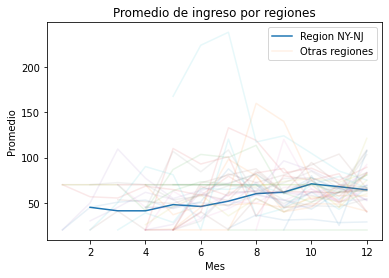

In [55]:

plt.figure()

region_income_mean.loc['NY-NJ'].plot(label='NY-NJ')
#region_income_mean.loc['NY'].plot(label='NY')

#plt.legend()
for region in region_income_mean.index.get_level_values('region').unique():
    if region != 'NY-NJ':
        region_income_mean.loc[region].plot(alpha=0.1)
plt.legend(["Region NY-NJ","Otras regiones"]) 
plt.title('Promedio de ingreso por regiones')
plt.xlabel('Mes')
plt.ylabel('Promedio')


plt.show()

La región NY-NJ tiene un comportamiento significativamente diferente a  17 regiones de 41, por lo cual podemos afirmar que

**La región NY-NJ  no se comporta de forma significativamente diferente a la mayoria de las regiones**

## Conclusión general


A lo largo del proyecto:
1. Se importaron los datos de distintas fuentes.
2. Se formatearon las columnas, eliminaron duplicados y corrigieron los tipos de datos:

    Pues las columnas podian confundirse entre ellas, los duplicados consumen memoria extra y entorpecen los analisís y las fechas estaban expresadas como texto plano.
3. se agregaron columnas de mes a multiples columnas y región a "usuarios" para su posterior analisís.
4. se aglutinaron los distintos datos para realizar analisis pertinentes.
5. Calculamos los ingresos de los usuarios por mes en función de las tarifas de sus planes.
6. graficamos el uso por mes y la distribución del uso de llamadas, minutos, mensajes e internet de los usuarios.
7. graficamos la distribución mensual y frecuencia de ingresos economicos.
8. comprobamos que plan produce mayores ingresos y si NY-NY se comporta particularmente diferente.

Con estos procedimientos podemos concluir lo siguiente:


1. Los usuarios de ambos planes usan las llamadas de forma similar.
2. Los usuarios del plan surf ocupan ligeramente menos mensajes que los del plan ultimate.
3. Los usuarios del plan surf consumen ligeramente menos datos que los usuarios ultimate y restringen su uso al inicio del año.
3. Los ingresos promedio de los planes son **Surf: 51 dólares** y **Ultimate: 72 dólares** al mes.
4. Podemos ver que los ingresos aumentan casi 50% entre el inicio y fin de año.
5. **El plan ultimate es el mas redituable.**
6. **La región "NY-NJ" no se comporta particularmente diferente a otras regiones.**



<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda realizar una conclusion general. Esta debe contener todo lo que se hizo en el proyecto de forma enumerada o items.

Desde la carga e importacion, pasando por los cambios realizado (Y el porque de esas decisiones). Agregando lo que se hizo en cada seccion a modo resumen y las conclusiones del  trabajo.

Sirve como resumen de lo realizado en cada proyecto.</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

He ampliado considerablemente la conclusión que habia puesto, ¿es suficiente asi o deberia ser mas detallada y extensa?
    
¿Es esto una forma de resumir y recalcar el valor del trabajo hecho en el proyecto?

</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido. Te quedo excelente, me encanto que lo enfoques en items para que quede mas claro.</div>

<div class="alert alert-block alert-danger">

<b>Comentario general #1</b> <a class="tocSkip"></a>

Omar, hiciste un trabajo muy bueno.

Abarcaste todos los puntos necesarios y lo manejaste de muy buena forma. Entendiste los metodos a utilizar ya  que hiciste un excelente trabajo tanto al explorar los datos como unir el dataset final.

Quedan detalles para aprobar el proyecto ya que si bien ahy varios, la mayoria no hacen al proyecto (Salvo a los ceils).

Recorda eliminar lo que esta entre corchetes ya que es un requisito de forma que sin el no se podra aprobar el proyecto.

Espero tus correcciones, saludos.</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Te agradezco bastante Ezequiel, estare a la espera de las segundas correcciones. 

</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Omar, corregiste todo de manera excelente. Habia varios detalles por ver y los abarcaste todo de muy buena forma.

Me encanto como quedo tu trabajo final, destaco muchisimo la calidad de tus analisis fueron minuciosas y precisas.

Sin mas, el trabajo queda **aprobado**.

Exitos en lo que viene, saludos.</div>